In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart-disease.csv')



In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.size

4242

In [7]:
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
unique_counts = pd.DataFrame(data.nunique(), columns=['Unique Count'])
unique_counts

,Unique Count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [10]:
duplicated_data = pd.DataFrame(data[data.duplicated()])
duplicated_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
row_163 = data.iloc[163]
row_163

age          38.0
sex           1.0
cp            2.0
trestbps    138.0
chol        175.0
fbs           0.0
restecg       1.0
thalach     173.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            4.0
thal          2.0
target        1.0
Name: 163, dtype: float64

In [12]:
data = data.drop_duplicates()

In [13]:
df_null = data[data.isnull()]
df_null.shape

(302, 14)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
summary_stats = []

for i in data.columns:
    mean_value = np.mean(data[i])    
    median_value = np.median(data[i])   
    summary_stats.append([i, mean_value, median_value])      

summary_df = pd.DataFrame(summary_stats, columns=['Column', 'Mean', 'Median'])
summary_df

,Column,Mean,Median
0,age,54.420530,55.5
1,sex,0.682119,1.0
2,cp,0.963576,1.0
3,trestbps,131.602649,130.0
4,chol,246.500000,240.5
5,fbs,0.149007,0.0
6,restecg,0.526490,1.0
7,thalach,149.569536,152.5
8,exang,0.327815,0.0
9,oldpeak,1.043046,0.8


In [19]:
have_disease = data[data['target'] == 1 ]


no_disease = data[data['target'] == 0 ]



In [27]:
have_disease.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
29   1    1   130       204   0    0        202      0      0.0      2      0   2     1         1
56   1    1   120       236   0    1        178      0      0.8      2      0   2     1         1
              130       221   0    0        163      0      0.0      2      0   3     1         1
          3   120       193   0    0        162      0      1.9      1      0   3     1         1
57   0    0   120       354   0    1        163      1      0.6      2      0   2     1         1
                                                                                               ..
48   1    0   122       222   0    0        186      0      0.0      2      0   2     1         1
          1   130       245   0    0        180      0      0.2      1      0   2     1         1
          2   124       255   1    1        175      0      0.0      2      2   2     1         1
49   0    0   130       2

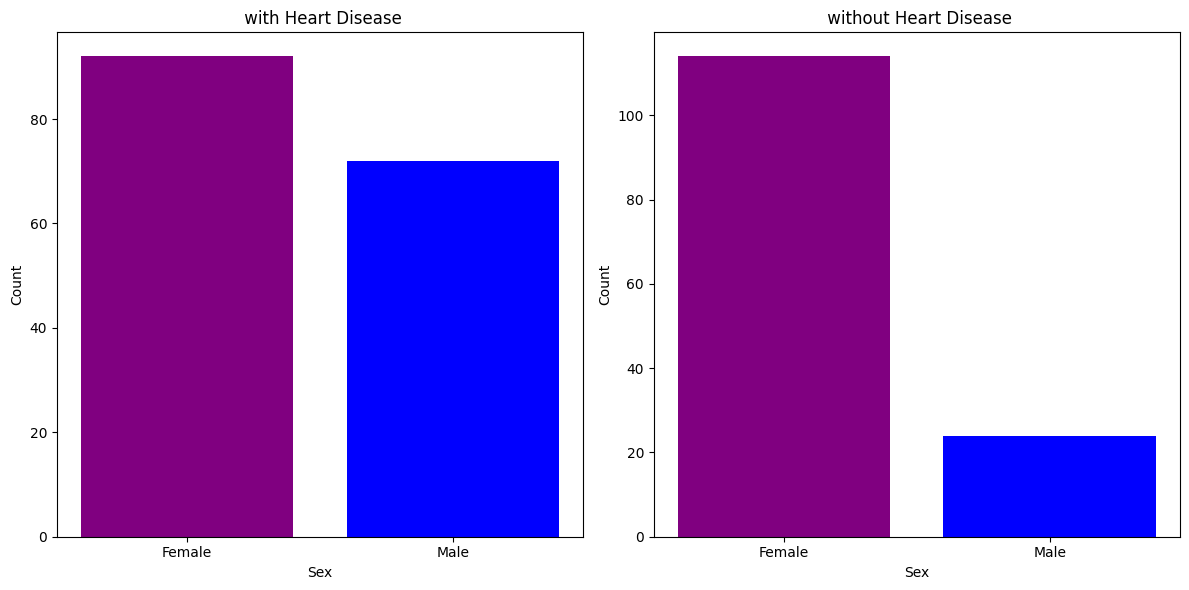

In [22]:
sex_counts_1 = have_disease['sex'].value_counts()

sex_counts_0 = no_disease['sex'].value_counts()

sex_labels = ['Female', 'Male']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].bar(sex_labels, sex_counts_1, color=['purple', 'blue'])
ax[0].set_title(' with Heart Disease')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sex')

ax[1].bar(sex_labels, sex_counts_0, color=['purple', 'blue'])
ax[1].set_title(' without Heart Disease')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sex')

plt.tight_layout()



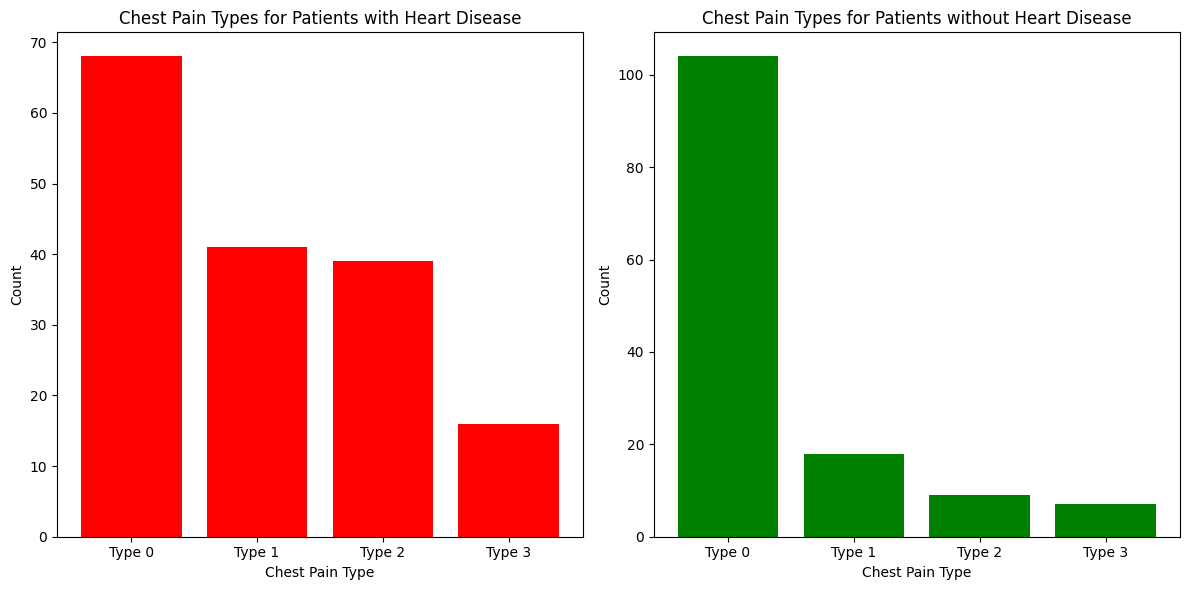

In [23]:

cp_count_1 = have_disease['cp'].value_counts()

cp_count_0 = no_disease['cp'].value_counts()

cp_labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].bar(cp_labels, cp_count_1, color='red')
ax[0].set_title('Chest Pain Types for Patients with Heart Disease')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Chest Pain Type')

ax[1].bar(cp_labels, cp_count_0, color='green')
ax[1].set_title('Chest Pain Types for Patients without Heart Disease')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Chest Pain Type')

plt.tight_layout()

plt.show()


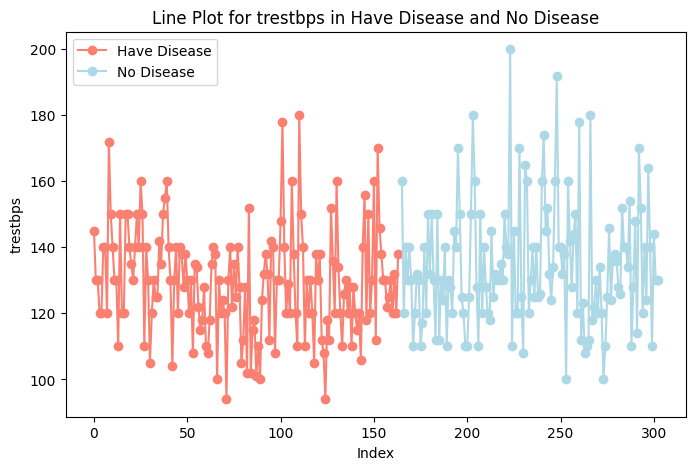

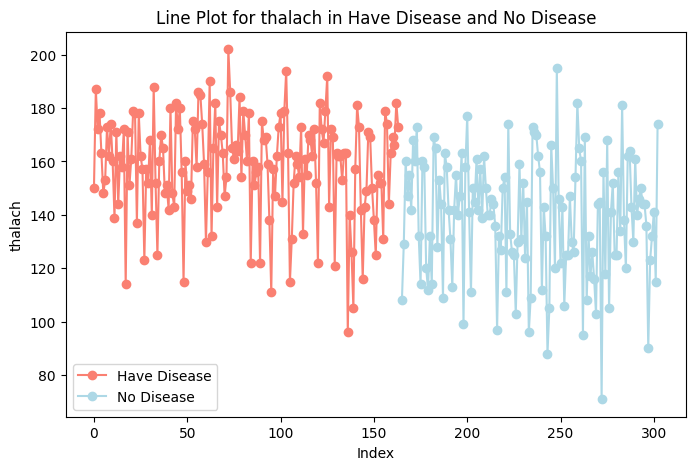

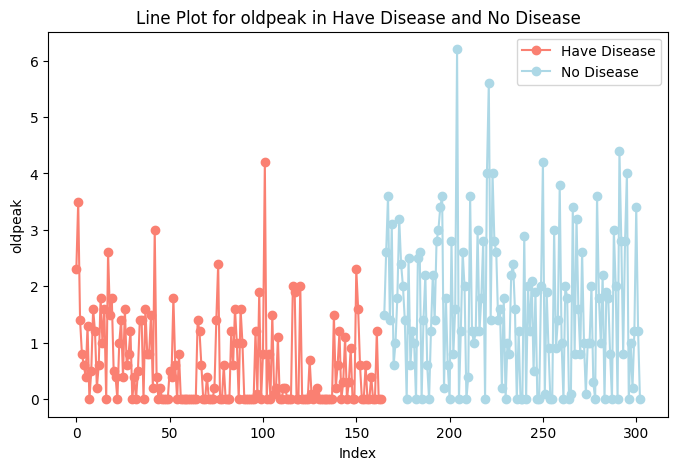

In [31]:
variables = ['trestbps', 'thalach', 'oldpeak']

for var in variables:
    fig, ax = plt.subplots(figsize=(8, 5))
    
    plt.plot(have_disease[var], marker='o', color='salmon', label='Have Disease')
    
    plt.plot(no_disease[var], marker='o', color='lightblue', label='No Disease')
    
    plt.xlabel('Index')
    plt.ylabel(f'{var}')
    plt.title(f'Line Plot for {var} in Have Disease and No Disease')
    plt.legend()
    
    plt.show()

In [32]:
mean_trestbps_have = have_disease['trestbps'].mean()
mean_trestbps_no = no_disease['trestbps'].mean()

mean_thalach_have = have_disease['thalach'].mean()
mean_thalach_no = no_disease['thalach'].mean()

mean_oldpeak_have = have_disease['oldpeak'].mean()
mean_oldpeak_no = no_disease['oldpeak'].mean()

df_means = pd.DataFrame({
    'have_disease': [mean_trestbps_have, mean_thalach_have, mean_oldpeak_have],
    'no_disease': [mean_trestbps_no, mean_thalach_no, mean_oldpeak_no]
}, index=['trestbps', 'thalach', 'oldpeak'])

df_means

,have_disease,no_disease
trestbps,129.250000,134.398551
thalach,158.378049,139.101449
oldpeak,0.586585,1.585507
